Read in the cleaned data and schema

In [1]:
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from collections import defaultdict
import general_functions as gf
%matplotlib inline

df = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data.csv', sep = ',', error_bad_lines = False, index_col = False)
df_schem = pd.read_csv(r'C:\\Users\\Jessica\\Desktop\\School\\Udacity Data Science\\Lesson 1 - Data Science Process\\Project 1\\reduced_data_schema.csv', sep = ',', error_bad_lines = False, index_col = False)

Remove responses of individuals who did not respond to the importance of formal education and create a list of unique responses

In [2]:
df = df.dropna(subset = ['NEWEdImpt'])
df['NEWEdImpt'] = df['NEWEdImpt'].astype(str)
ed_impt_resp = list(df['NEWEdImpt'].unique())
ed_impt_resp

['Fairly important',
 'Not at all important/not necessary',
 'Very important',
 'Somewhat important',
 'Critically important']

Create data frame of unique responses sorted by total count and graph

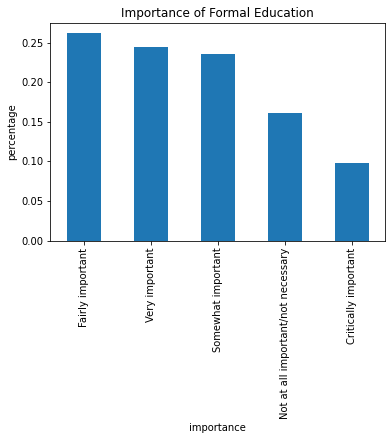

,count
importance,
Fairly important,0.261508
Very important,0.244836
Somewhat important,0.234974
Not at all important/not necessary,0.160631
Critically important,0.098050


In [3]:
ed_impt = df['NEWEdImpt'].value_counts().reset_index()
ed_impt.rename(columns = {'index':'importance','NEWEdImpt':'count'}, inplace = True)
ed_impt_df = gf.total_count(ed_impt,'importance','count',ed_impt_resp)
gf.bar_plotting(ed_impt_df,'Importance of Formal Education',plot = True)

Reassign ages in to bins containing a certain age range

In [4]:
def age_bins(age):
    
    if age < 10 :
        return 'Under 10 Years'
    elif age >= 10 and age < 20:
        return '10-19 Years'
    elif age >= 20 and age < 30:
        return '20-29 Years'
    elif age >= 30 and age < 40:
        return '30-39 Years'
    elif age >= 40 and age < 50:
        return '40-49 Years'
    elif age >= 50 and age < 60:
        return '50-59 Years'
    elif age >= 60 and age < 70:
        return '60-69 Years'
    elif age >= 70 and age < 80:
        return '70-79 Years'
    else:
        return 'Over 80 Years'

Create a new data frame sorted by the count of individuals in each age range, graph, and add a column to the dataframe with the age ranges.

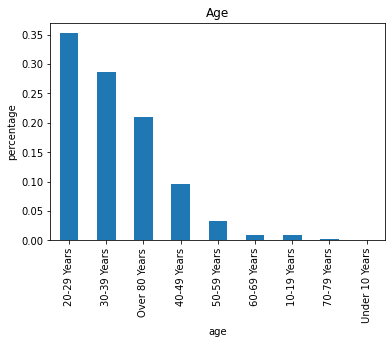

,count
age,
20-29 Years,0.352605
30-39 Years,0.286537
Over 80 Years,0.210275
40-49 Years,0.096152
50-59 Years,0.033509
60-69 Years,0.009553
10-19 Years,0.009533
70-79 Years,0.001795
Under 10 Years,0.000041


In [5]:
age_df = df['Age'].apply(age_bins).value_counts().reset_index()
age_df.rename(columns={'index':'age','Age':'count'}, inplace = True)
df['AgeRanges'] = df['Age'].apply(age_bins)
gf.bar_plotting(age_df,'Age',plot = True)

Create dataframes filtered by age ranges

In [6]:
range_1 = gf.percentage_breakdown(df[df['AgeRanges'] == 'Under 10 Years'], ed_impt_resp, 'NEWEdImpt', 'Under 10 Years')
range_2 = gf.percentage_breakdown(df[df['AgeRanges'] == '10-19 Years'], ed_impt_resp, 'NEWEdImpt', '10-19 Years')
range_3 = gf.percentage_breakdown(df[df['AgeRanges'] == '20-29 Years'], ed_impt_resp, 'NEWEdImpt', '20-29 Years')
range_4 = gf.percentage_breakdown(df[df['AgeRanges'] == '30-39 Years'], ed_impt_resp, 'NEWEdImpt', '30-39 Years')
range_5 = gf.percentage_breakdown(df[df['AgeRanges'] == '40-49 Years'], ed_impt_resp, 'NEWEdImpt', '40-49 Years')
range_6 = gf.percentage_breakdown(df[df['AgeRanges'] == '50-59 Years'], ed_impt_resp, 'NEWEdImpt', '50-59 Years')
range_7 = gf.percentage_breakdown(df[df['AgeRanges'] == '60-69 Years'], ed_impt_resp, 'NEWEdImpt', '60-69 Years')
range_8 = gf.percentage_breakdown(df[df['AgeRanges'] == '70-79 Years'], ed_impt_resp, 'NEWEdImpt', '70-79 Years')
range_9 = gf.percentage_breakdown(df[df['AgeRanges'] == 'Over 80 Years'], ed_impt_resp, 'NEWEdImpt', 'Over 80 Years')

Create a table of the top language used by each age range

In [7]:
list_of_ranges = [range_1, range_2, range_3, range_4, range_5, range_6, range_7, range_8, range_9]
top_ed_impt_resp = pd.DataFrame(columns = ['Age Range','Education Importance'])
top_ed_impt_resp = gf.add_top_per_cat(top_ed_impt_resp, list_of_ranges)
top_ed_impt_resp

,Age Range,Education Importance
0,Under 10 Years,Fairly important
1,10-19 Years,Not at all important/not necessary
2,20-29 Years,Fairly important
3,30-39 Years,Fairly important
4,40-49 Years,Fairly important
5,50-59 Years,Very important
6,60-69 Years,Very important
7,70-79 Years,Not at all important/not necessary
8,Over 80 Years,Very important


Create a table comparing the percentage breakdown of each language worked with by age range and compare to the total breakdown

In [8]:
comp_df = pd.merge(range_1, range_2, how = 'outer', left_index = True, right_index = True)
comp_df.columns = ['Under 10 Years', '10-19 Years']
for x in list_of_ranges[2:]:
    comp_df[x.columns[0]] = x
comp_df['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df = comp_df.sort_values(by=['Total'], ascending = False)
comp_df = comp_df.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df

,Under 10 Years,10-19 Years,20-29 Years,30-39 Years,40-49 Years,50-59 Years,60-69 Years,70-79 Years,Over 80 Years,Total
NEWEdImpt,,,,,,,,,,
Fairly important,0.500000,0.218615,0.278542,0.258875,0.244421,0.219828,0.213823,0.195402,0.255618,0.261508
Very important,nan,0.173160,0.237989,0.231295,0.243348,0.262315,0.233261,0.206897,0.276813,0.244836
Somewhat important,0.500000,0.216450,0.242261,0.252826,0.233262,0.216133,0.205184,0.195402,0.204690,0.234974
Not at all important/not necessary,nan,0.309524,0.152145,0.167135,0.181974,0.176724,0.187905,0.218391,0.145226,0.160631
Critically important,nan,0.082251,0.089063,0.089868,0.096996,0.125000,0.159827,0.183908,0.117653,0.098050


Begin analysis with employment status

In [9]:
employ_resp = list(df['Employment'].unique())
employ_resp

['Independent contractor, freelancer, or self-employed',
 'Employed full-time',
 nan,
 'Not employed, but looking for work',
 'Employed part-time',
 'Retired',
 'Not employed, and not looking for work']

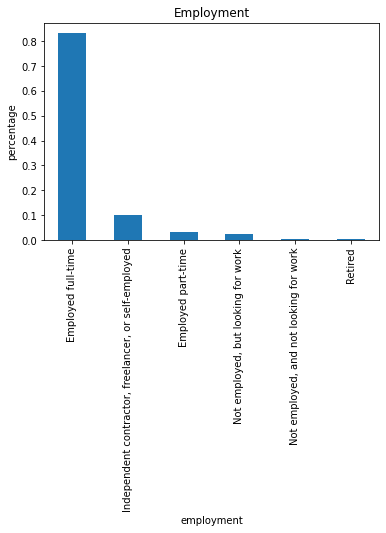

,count
employment,
Employed full-time,0.832508
"Independent contractor, freelancer, or self-employed",0.100184
Employed part-time,0.032980
"Not employed, but looking for work",0.025974
"Not employed, and not looking for work",0.004312
Retired,0.004042


In [10]:
employment_df = df['Employment'].value_counts().reset_index()
employment_df.rename(columns = {'index':'employment','Employment':'count'}, inplace = True)
gf.bar_plotting(employment_df,'Employment',plot = True)

In [11]:
emp_stat_1 = gf.percentage_breakdown(df[df['Employment'] == 'Employed full-time'], ed_impt_resp, 'NEWEdImpt', 'Employed full-time')
emp_stat_2 = gf.percentage_breakdown(df[df['Employment'] == 'Independent contractor, freelancer, or self-employed'], ed_impt_resp,                                         'NEWEdImpt', 'Independent contractor, freelancer, or self-employed')
emp_stat_3 = gf.percentage_breakdown(df[df['Employment'] == 'Employed part-time'], ed_impt_resp, 'NEWEdImpt', 'Employed part-time')
emp_stat_4 = gf.percentage_breakdown(df[df['Employment'] == 'Not employed, but looking for work'], ed_impt_resp, 'NEWEdImpt', 
                                     'Not employed, but looking for work')
emp_stat_5 = gf.percentage_breakdown(df[df['Employment'] == 'Not employed, and not looking for work'], ed_impt_resp, 'NEWEdImpt', 
                                     'Not employed, and not looking for work')
emp_stat_6 = gf.percentage_breakdown(df[df['Employment'] == 'Retired'], ed_impt_resp, 'NEWEdImpt', 'Retired')

In [12]:
list_of_emp = [emp_stat_1, emp_stat_2, emp_stat_3, emp_stat_4, emp_stat_5, emp_stat_6]
top_employment_resp = pd.DataFrame(columns = ['Employment','Education Importance'])
top_employment_resp = gf.add_top_per_cat(top_employment_resp, list_of_emp)
top_employment_resp

,Employment,Education Importance
0,Employed full-time,Fairly important
1,"Independent contractor, freelancer, or self-em...",Somewhat important
2,Employed part-time,Fairly important
3,Not ...,Very important
4,Not empl...,Not at all important/not necessary
5,Retired,Not at all important/not necessary


In [13]:
comp_df_2 = pd.merge(emp_stat_1, emp_stat_2, how = 'outer', left_index = True, right_index = True)
comp_df_2.columns = ['Employed full-time', 'Independent contractor, freelancer, or self-employed']
for x in list_of_emp[2:]:
    comp_df_2[x.columns[0]] = x
comp_df_2['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df_2 = comp_df_2.sort_values(by = ['Total'], ascending = False)
comp_df_2 = comp_df_2.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_2

,Employed full-time,"Independent contractor, freelancer, or self-employed",Employed part-time,"Not employed, but looking for work","Not employed, and not looking for work",Retired,Total
NEWEdImpt,,,,,,,
Fairly important,0.266228,0.235671,0.280955,0.225858,0.177885,0.174359,0.261508
Very important,0.250965,0.191393,0.262099,0.249800,0.158654,0.225641,0.244836
Somewhat important,0.234282,0.250155,0.218102,0.235435,0.235577,0.169231,0.234974
Not at all important/not necessary,0.149125,0.242086,0.142049,0.185156,0.302885,0.235897,0.160631
Critically important,0.099400,0.080695,0.096794,0.103751,0.125000,0.194872,0.098050


Begin ethnicity analysis

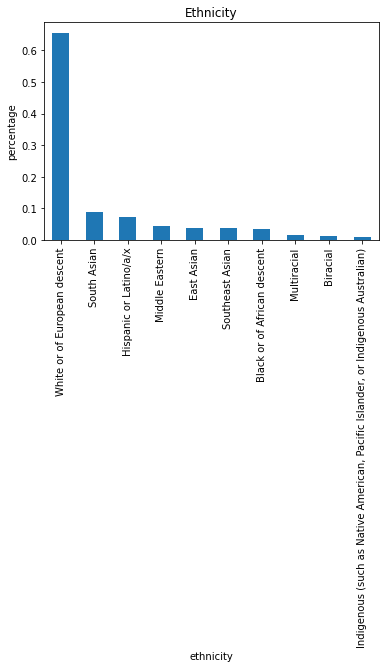

,count
ethnicity,
White or of European descent,0.656663
South Asian,0.086405
Hispanic or Latino/a/x,0.072204
Middle Eastern,0.043779
East Asian,0.037916
Southeast Asian,0.035970
Black or of African descent,0.033135
Multiracial,0.015690
Biracial,0.010765


In [14]:
ethnicity_resp = ['Black or of African descent','East Asian','Hispanic or Latino/a/x','Middle Eastern','White or of European descent',                  'Biracial','Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)','South Asian',                          'Multiracial','Southeast Asian','I don\'t know','Prefer not to say']
ethnicity = df['Ethnicity'].value_counts().reset_index()
ethnicity.rename(columns = {'index':'ethnicity','Ethnicity':'count'}, inplace = True)
ethnicity_df = gf.total_count(ethnicity,'ethnicity','count',ethnicity_resp)
gf.bar_plotting(ethnicity_df,'Ethnicity',plot = True)

In [15]:
eth_1 = gf.percentage_breakdown(df[df['Ethnicity'] == 'White or of European descent'], ed_impt_resp, 'NEWEdImpt', 
                                'White or of European descent')
eth_2 = gf.percentage_breakdown(df[df['Ethnicity'] == 'South Asian'], ed_impt_resp, 'NEWEdImpt', 'South Asian')
eth_3 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Hispanic or Latino/a/x'], ed_impt_resp, 'NEWEdImpt', 'Hispanic or Latino/a/x')
eth_4 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Middle Eastern'], ed_impt_resp, 'NEWEdImpt', 'Middle Eastern')
eth_5 = gf.percentage_breakdown(df[df['Ethnicity'] == 'East Asian'], ed_impt_resp, 'NEWEdImpt', 'East Asian')
eth_6 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Southeast Asian'], ed_impt_resp, 'NEWEdImpt', 'Southeast Asian')
eth_7 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Black or of African descent'], ed_impt_resp, 'NEWEdImpt', 
                                'Black or of African descent')
eth_8 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Multiracial'], ed_impt_resp, 'NEWEdImpt', 'Multiracial')
eth_9 = gf.percentage_breakdown(df[df['Ethnicity'] == 'Biracial'], ed_impt_resp, 'NEWEdImpt', 'Biracial')
eth_10 = gf.percentage_breakdown(df[df['Ethnicity'] == 
                                 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)'], ed_impt_resp,                                    'NEWEdImpt', 'Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)')

In [16]:
list_of_eth = [eth_1, eth_2, eth_3, eth_4, eth_5, eth_6, eth_7, eth_8, eth_9, eth_10]
top_ethnicity_resp = pd.DataFrame(columns = ['Ethnicity','Education Importance'])
top_ethnicity_resp = gf.add_top_per_cat(top_ethnicity_resp, list_of_eth)
top_ethnicity_resp

,Ethnicity,Education Importance
0,White or of European descent,Fairly important
1,South Asian,Very important
2,Hispanic or Latino/a/x,Very important
3,Middle Eastern,Fairly important
4,East Asian,Fairly important
5,Southeast Asian,Fairly important
6,Black or of African descent,Very important
7,Multiracial,Fairly important
8,Biracial,Somewhat important
9,"Indigenous (such as Native American, Pacific I...",Very important


In [17]:
comp_df_3 = pd.merge(eth_1, eth_2, how = 'outer', left_index = True, right_index = True)
comp_df_3.columns = ['White or of European descent', 'South Asian']
for x in list_of_eth[2:]:
    comp_df_3[x.columns[0]] = x
comp_df_3['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df_3 = comp_df_3.sort_values(by = ['Total'], ascending = False)
comp_df_3 = comp_df_3.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_3

,White or of European descent,South Asian,Hispanic or Latino/a/x,Middle Eastern,East Asian,Southeast Asian,Black or of African descent,Multiracial,Biracial,"Indigenous (such as Native American, Pacific Islander, or Indigenous Australian)",Total
NEWEdImpt,,,,,,,,,,,
Fairly important,0.257060,0.285292,0.265202,0.269231,0.276899,0.299517,0.263397,0.254167,0.183333,0.155556,0.261508
Very important,0.219210,0.290608,0.324987,0.233846,0.253956,0.275362,0.291553,0.220833,0.200000,0.444444,0.244836
Somewhat important,0.256865,0.199941,0.188554,0.244615,0.242089,0.210145,0.214351,0.250000,0.341667,0.155556,0.234974
Not at all important/not necessary,0.185969,0.095688,0.096576,0.160000,0.091772,0.098229,0.118983,0.170833,0.200000,0.133333,0.160631
Critically important,0.080895,0.128470,0.124681,0.092308,0.135285,0.116747,0.111717,0.104167,0.075000,0.111111,0.098050


Begin gender analysis

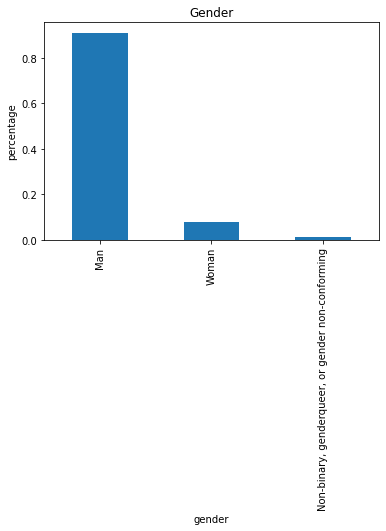

,count
gender,
Man,0.911206
Woman,0.077407
"Non-binary, genderqueer, or gender non-conforming",0.011386


In [18]:
gender_resp = ['Woman','Man','Non-binary, genderqueer, or gender non-conforming']
gender = df['Gender'].value_counts().reset_index()
gender.rename(columns = {'index':'gender','Gender':'count'}, inplace = True)
gender_df = gf.total_count(gender,'gender','count',gender_resp)
gf.bar_plotting(gender_df,'Gender',plot=True)

In [19]:
gen_1 = gf.percentage_breakdown(df[df['Gender'] == 'Man'], ed_impt_resp, 'NEWEdImpt', 'Man')
gen_2 = gf.percentage_breakdown(df[df['Gender'] == 'Woman'], ed_impt_resp, 'NEWEdImpt', 'Woman')
gen_3 = gf.percentage_breakdown(df[df['Gender'] == 'Non-binary, genderqueer, or gender non-conforming'], ed_impt_resp, 'NEWEdImpt',                                   'Non-binary, genderqueer, or gender non-conforming')

In [20]:
list_of_gen = [gen_1, gen_2, gen_3]
top_gender_resp = pd.DataFrame(columns = ['Gender','Education Importance'])
top_gender_resp = gf.add_top_per_cat(top_gender_resp, list_of_gen)
top_gender_resp

,Gender,Education Importance
0,Man,Fairly important
1,Woman,Fairly important
2,"Non-binary, genderqueer, or gender non-conforming",Somewhat important


In [21]:
comp_df_4 = pd.merge(gen_1, gen_2, how = 'outer', left_index = True, right_index = True)
comp_df_4.columns = ['Man', 'Woman']
for x in list_of_gen[2:]:
    comp_df_4[x.columns[0]] = x
comp_df_4['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df_4 = comp_df_4.sort_values(by = ['Total'], ascending = False)
comp_df_4 = comp_df_4.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_4    

,Man,Woman,"Non-binary, genderqueer, or gender non-conforming",Total
NEWEdImpt,,,,
Fairly important,0.264401,0.250239,0.218430,0.261508
Very important,0.240739,0.249920,0.184300,0.244836
Somewhat important,0.240034,0.240664,0.249147,0.234974
Not at all important/not necessary,0.160649,0.159272,0.242321,0.160631
Critically important,0.094177,0.099904,0.105802,0.098050


Begin Years Code analysis

In [22]:
def yr_bin(yrs):
    
    if yrs == 'Less than 1 year' :
        return 'Less than 1 year'
    elif yrs in ['1','2','3','4','5','6','7','8','9']:
        return '1-9 Years'
    elif yrs in ['10', '11', '12','13','14','15','16','17','18','19']:
        return '10-19 Years'
    elif yrs in ['20', '21', '22','23','24','25','26','27','28','29']:
        return '20-29 Years'
    elif yrs in ['30', '31', '32','33','34','35','36','37','38','39']:
        return '30-39 Years'
    elif yrs in ['40', '41', '42','43','44','45','46','47','48','49', '50']:
        return '40-50 Years'
    else:
        return 'More than 50 years'

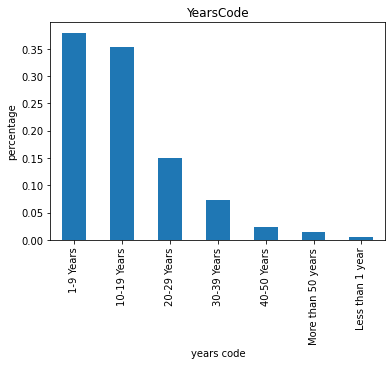

,count
years code,
1-9 Years,0.379201
10-19 Years,0.352770
20-29 Years,0.150418
30-39 Years,0.072939
40-50 Years,0.024389
More than 50 years,0.015331
Less than 1 year,0.004952


In [23]:
yr_code_df = df['YearsCode'].apply(yr_bin).value_counts().reset_index()
yr_code_df.rename(columns = {'index':'years code','YearsCode':'count'}, inplace = True)
df['YearsCode Ranges'] = df['YearsCode'].apply(yr_bin)
gf.bar_plotting(yr_code_df,'YearsCode',plot=True)

In [24]:
yr_1 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '1-9 Years'], ed_impt_resp, 'NEWEdImpt', '1-9 Years')
yr_2 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '10-19 Years'], ed_impt_resp, 'NEWEdImpt', '10-19 Years')
yr_3 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '20-29 Years'], ed_impt_resp, 'NEWEdImpt', '20-29 Years')
yr_4 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '30-39 Years'], ed_impt_resp, 'NEWEdImpt', '30-39 Years')
yr_5 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == '40-50 Years'], ed_impt_resp, 'NEWEdImpt', '40-50 Years')
yr_6 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == 'More than 50 years'], ed_impt_resp, 'NEWEdImpt', 'More than 50 years')
yr_7 = gf.percentage_breakdown(df[df['YearsCode Ranges'] == 'Less than 1 year'], ed_impt_resp, 'NEWEdImpt', 'Less than 1 year')

In [25]:
list_of_yrs = [yr_1, yr_2, yr_3, yr_4, yr_5, yr_6, yr_7]
top_yrs_resp = pd.DataFrame(columns = ['YearCode Ranges','Education Importance'])
top_yrs_resp = gf.add_top_per_cat(top_yrs_resp, list_of_yrs)
top_yrs_resp

,YearCode Ranges,Education Importance
0,1-9 Years,Fairly important
1,10-19 Years,Fairly important
2,20-29 Years,Fairly important
3,30-39 Years,Very important
4,40-50 Years,Very important
5,More than 50 years,Very important
6,Less than 1 year,Not at all important/not necessary


In [26]:
comp_df_5 = pd.merge(yr_1, yr_2, how = 'outer', left_index = True, right_index = True)
comp_df_5.columns = ['1-9 Years', '10-19 Years']
for x in list_of_yrs[2:]:
    comp_df_5[x.columns[0]] = x
comp_df_5['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df_5 = comp_df_5.sort_values(by = ['Total'], ascending = False)
comp_df_5 = comp_df_5.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_5

,1-9 Years,10-19 Years,20-29 Years,30-39 Years,40-50 Years,More than 50 years,Less than 1 year,Total
NEWEdImpt,,,,,,,,
Fairly important,0.265861,0.273147,0.248148,0.239887,0.205584,0.226110,0.208333,0.261508
Very important,0.239253,0.248757,0.247051,0.240453,0.263113,0.267833,0.229167,0.244836
Somewhat important,0.237349,0.236006,0.242524,0.220368,0.205584,0.200538,0.216667,0.234974
Not at all important/not necessary,0.169877,0.141545,0.167215,0.180198,0.175973,0.149394,0.283333,0.160631
Critically important,0.087659,0.100544,0.095062,0.119095,0.149746,0.156124,0.062500,0.098050


Begin Undergrad Major analysis

In [27]:
undergrad_resp = list(df['UndergradMajor'].unique())
undergrad_resp

['Computer science, computer engineering, or software engineering',
 nan,
 'Mathematics or statistics',
 'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
 'A humanities discipline (such as literature, history, philosophy, etc.)',
 'Information systems, information technology, or system administration',
 'Web development or web design',
 'A natural science (such as biology, chemistry, physics, etc.)',
 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)',
 'I never declared a major',
 'A health science (such as nursing, pharmacy, radiology, etc.)',
 'A social science (such as anthropology, psychology, political science, etc.)',
 'A business discipline (such as accounting, finance, marketing, etc.)']

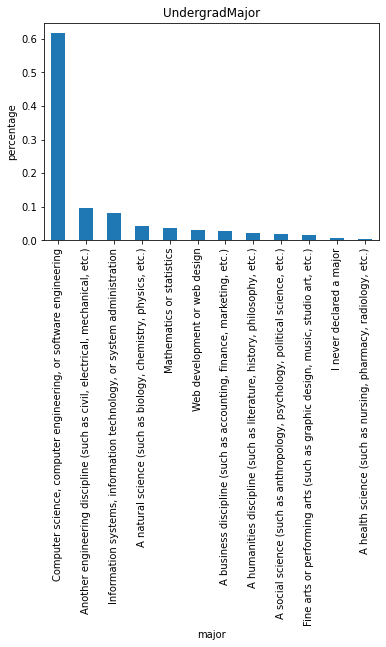

,count
major,
"Computer science, computer engineering, or software engineering",0.616277
"Another engineering discipline (such as civil, electrical, mechanical, etc.)",0.095490
"Information systems, information technology, or system administration",0.080315
"A natural science (such as biology, chemistry, physics, etc.)",0.044074
Mathematics or statistics,0.036620
Web development or web design,0.032492
"A business discipline (such as accounting, finance, marketing, etc.)",0.027493
"A humanities discipline (such as literature, history, philosophy, etc.)",0.020888
"A social science (such as anthropology, psychology, political science, etc.)",0.018879


In [28]:
undergrad_resp = ['Computer science, computer engineering, or software engineering','Web development or web design',
                  'Information systems, information technology, or system administration','Mathematics or statistics',
                  'Another engineering discipline (such as civil, electrical, mechanical, etc.)',
                  'A business discipline (such as accounting, finance, marketing, etc.)',
                  'A health science (such as nursing, pharmacy, radiology, etc.)',
                  'A humanities discipline (such as literature, history, philosophy, etc.)',
                  'A natural science (such as biology, chemistry, physics, etc.)',
                  'A social science (such as anthropology, psychology, political science, etc.)',
                  'Fine arts or performing arts (such as graphic design, music, studio art, etc.)','I never declared a major']
major = df['UndergradMajor'].value_counts().reset_index()
major.rename(columns = {'index':'major','UndergradMajor':'count'}, inplace = True)
major_df = gf.total_count(major,'major','count',undergrad_resp)
gf.bar_plotting(major_df,'UndergradMajor',plot = True)

In [29]:
mjr_1 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'Computer science, computer engineering, or software engineering'],                                        ed_impt_resp, 'NEWEdImpt', 'Computer/Software Engineering')
mjr_2 = gf.percentage_breakdown(df[df['UndergradMajor'] == 
                                'Another engineering discipline (such as civil, electrical, mechanical, etc.)'], ed_impt_resp,                                        'NEWEdImpt', 'Another engineering discipline')
mjr_3 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'Information systems, information technology, or system administration'],                                    ed_impt_resp, 'NEWEdImpt', 'Information systems, information technology, or system administration')
mjr_4 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'A natural science (such as biology, chemistry, physics, etc.)'],                                            ed_impt_resp, 'NEWEdImpt', 'Natural Science')
mjr_5 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'Mathematics or statistics'], ed_impt_resp, 'NEWEdImpt', 
                                'Mathematics or statistics')
mjr_6 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'Web development or web design'], ed_impt_resp, 'NEWEdImpt', 
                                'Web development or web design')
mjr_7 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'A business discipline (such as accounting, finance, marketing, etc.)'],                                     ed_impt_resp, 'NEWEdImpt', 'Business')
mjr_8 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'A humanities discipline (such as literature, history, philosophy, etc.)'],                                ed_impt_resp, 'NEWEdImpt', 'Humanities')
mjr_9 = gf.percentage_breakdown(df[df['UndergradMajor'] ==
                                'A social science (such as anthropology, psychology, political science, etc.)'], ed_impt_resp,                                        'NEWEdImpt', 'Social Science')
mjr_10 = gf.percentage_breakdown(df[df['UndergradMajor'] ==
                                 'Fine arts or performing arts (such as graphic design, music, studio art, etc.)'], ed_impt_resp,                                      'NEWEdImpt', 'Fine Arts or Performing Arts')
mjr_10 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'I never declared a major'], ed_impt_resp, 'NEWEdImpt', 
                                 'I never declared a major')
mjr_11 = gf.percentage_breakdown(df[df['UndergradMajor'] == 'A health science (such as nursing, pharmacy, radiology, etc.)'],                                          ed_impt_resp, 'NEWEdImpt', 'Health Science')

In [30]:
list_of_mjrs = [mjr_1, mjr_2, mjr_3, mjr_4, mjr_5, mjr_6, mjr_7, mjr_8, mjr_9, mjr_10, mjr_11]
top_mjrs_resp = pd.DataFrame(columns = ['Undergrad Major','Education Importance'])
top_mjrs_resp = gf.add_top_per_cat(top_mjrs_resp, list_of_mjrs)
top_mjrs_resp

,Undergrad Major,Education Importance
0,Computer/Software Engineering,Very important
1,Another engineering discipline,Somewhat important
2,"Information systems, information technology, o...",Fairly important
3,Natural Science,Somewhat important
4,Mathematics or statistics,Fairly important
5,Web development or web design,Somewhat important
6,Business,Not at all important/not necessary
7,Humanities,Not at all important/not necessary
8,Social Science,Not at all important/not necessary
9,I never declared a major,Not at all important/not necessary


In [31]:
comp_df_6 = pd.merge(mjr_1, mjr_2, how = 'outer', left_index = True, right_index = True)
comp_df_6.columns = ['Computer/Software Engineering', 'Another engineering discipline']
for x in list_of_mjrs[2:]:
    comp_df_6[x.columns[0]] = x
comp_df_6['Total'] = gf.percentage_breakdown(df, ed_impt_resp, 'NEWEdImpt', 'Total')
comp_df_6 = comp_df_6.sort_values(by = ['Total'], ascending = False)
comp_df_6 = comp_df_6.style.apply(lambda x: ['background: green' if v >= (1.5*x.iloc[-1]) 
                                                             else ('background: yellow' if v >= (1.25*x.iloc[-1]) 
                                                             else ('background: red' if v <= (0.75*x.iloc[-1]) 
                                                                   else '')) for v in x], axis = 1)
comp_df_6

,Computer/Software Engineering,Another engineering discipline,"Information systems, information technology, or system administration",Natural Science,Mathematics or statistics,Web development or web design,Business,Humanities,Social Science,I never declared a major,Health Science,Total
NEWEdImpt,,,,,,,,,,,,
Fairly important,0.290194,0.257537,0.282301,0.224810,0.249238,0.250000,0.191558,0.179487,0.179669,0.114613,0.133663,0.261508
Very important,0.290592,0.215938,0.247291,0.190380,0.232176,0.239698,0.143669,0.077991,0.105201,0.060172,0.123762,0.244836
Somewhat important,0.210059,0.261977,0.265907,0.251139,0.240098,0.263736,0.300325,0.297009,0.327423,0.269341,0.247525,0.234974
Not at all important/not necessary,0.096647,0.168497,0.123645,0.195443,0.128580,0.186813,0.327922,0.411325,0.338061,0.532951,0.366337,0.160631
Critically important,0.112507,0.096050,0.080856,0.138228,0.149909,0.059753,0.036526,0.034188,0.049645,0.022923,0.128713,0.098050
